<a href="https://colab.research.google.com/github/NadiaJamshaid/Google_Play_Store_EDA/blob/main/US_Accident_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Accident Explorstory Data Analysis

# About Dataset
- ##  Description

This is a countrywide car accident dataset that covers 49 states of the USA. The accident data were collected from **February 2016 to March 2023**, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks. The dataset currently contains approximately **7.7 million** accident records.

## **Download the dataset**

In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadiajamshaid","key":"2ecb675146123c4f5848ab968c462647"}'}

In [2]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [3]:
!kaggle datasets download -d sobhanmoosavi/us-accidents


Dataset URL: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
License(s): CC-BY-NC-SA-4.0
100% 651M/653M [00:21<00:00, 41.8MB/s]
100% 653M/653M [00:21<00:00, 32.5MB/s]


In [4]:
import zipfile
dataset_path = "us-accidents.zip"  # Change if the filename is different
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("us_accidents_data")  # Extract into this folder


In [5]:
import os
print(os.listdir("us_accidents_data"))  # List extracted files


['US_Accidents_March23.csv']


## **Data Prepration And Cleaning**
- Load the file using pandas
- Lock up some information about column and data
- fix incorrect and missing values

In [6]:
import pandas as pd

df = pd.read_csv("us_accidents_data/US_Accidents_March23.csv", nrows=10000)  # Load only 10,000 rows
df.head()



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
len(df.columns)

46

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     10000 non-null  object 
 1   Source                 10000 non-null  object 
 2   Severity               10000 non-null  int64  
 3   Start_Time             10000 non-null  object 
 4   End_Time               10000 non-null  object 
 5   Start_Lat              10000 non-null  float64
 6   Start_Lng              10000 non-null  float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           10000 non-null  float64
 10  Description            10000 non-null  object 
 11  Street                 10000 non-null  object 
 12  City                   10000 non-null  object 
 13  County                 10000 non-null  object 
 14  State                  10000 non-null  object 
 15  Zip

In [10]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,10000.00000,10000.000000,10000.000000,0.0,0.0,10000.000000,9915.000000,1426.000000,9876.000000,9965.000000,9904.000000,8226.000000,1123.000000
mean,2.39470,38.128680,-119.041084,NaN,NaN,0.021386,59.643732,33.126157,64.083131,30.012505,8.914297,8.860528,0.027720
std,0.49126,0.749559,9.963780,NaN,NaN,0.397797,17.369289,10.297458,24.475341,0.316665,2.570054,4.592276,0.046018
min,1.00000,36.352592,-123.810753,NaN,NaN,0.000000,3.900000,-8.400000,8.000000,3.010000,0.200000,1.200000,0.000000
25%,2.00000,37.643864,-122.159031,NaN,NaN,0.000000,48.200000,27.500000,46.000000,29.900000,10.000000,5.800000,0.000000
50%,2.00000,37.959778,-121.875954,NaN,NaN,0.010000,57.000000,36.400000,67.000000,30.010000,10.000000,8.100000,0.010000
75%,3.00000,38.574538,-121.349976,NaN,NaN,0.010000,71.100000,40.800000,86.000000,30.120000,10.000000,11.500000,0.040000
max,4.00000,41.428753,-81.550728,NaN,NaN,24.040000,106.000000,66.000000,100.000000,30.620000,80.000000,33.400000,0.490000


## Ask Question...
- Are there is more accidents in warmer and colder areas?
- Which States have the hightest num of accidents?
- what is the starting time of the more accidents?
- What are the ending time of the accidents?
# **Exploratory Data Analysis (EDA) Questions**

## **1. Severity and Accident Trends**
- What is the distribution of accident severity (`Severity`)?
- How does `Severity` vary across different `State` and `City`?
- Are there more accidents during specific `Timezone` regions?
- What is the average `Distance(mi)` covered in accidents of different severities?

## **2. Time-Based Analysis**
- What are the peak accident hours based on `Start_Time`?
- How does the frequency of accidents change across different `Timezone`?
- Do accidents occur more frequently during `Sunrise_Sunset` (Day vs. Night)?
- What is the trend of accidents based on `Civil_Twilight`, `Nautical_Twilight`, and `Astronomical_Twilight`?

## **3. Location-Based Analysis**
- Which `State` and `City` have the highest number of accidents?
- How do accidents vary in urban vs. rural areas (`Street`, `Zipcode`)?
- What are the most accident-prone `County`?

## **4. Weather and Environmental Conditions**
- How does `Temperature(F)` affect accident occurrence?
- Does `Humidity(%)` or `Pressure(in)` correlate with accident frequency?
- What is the impact of `Wind_Speed(mph)` and `Precipitation(in)` on accidents?
- Which `Weather_Condition` is most associated with severe accidents?

## **5. Road Features and Accidents**
- How do different `Amenity` and `Traffic_Calming` conditions impact accidents?
- Are there more accidents near `Railway`, `Junction`, `Crossing`, or `Traffic_Signal`?
- Do specific intersections (`Bump`, `Stop`, `Give_Way`) contribute to more accidents?

## **6. Missing Data Exploration**
- Which columns have the highest percentage of missing values?
- Should `End_Lat` and `End_Lng` be dropped since they are completely empty?
- How does missing `Weather_Timestamp` affect weather-related analysis?

## **7. Correlation Analysis**
- What are the correlations between `Temperature(F)`, `Humidity(%)`, `Pressure(in)`, and accident severity?
- Is there any relationship between `Wind_Direction` and accident severity?
- How strongly does `Distance(mi)` correlate with accident `Severity`?

---



In [11]:
numerics=['int16','int32','int64','float16','float32','float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)



13

In [12]:
missing_percentage=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentage

,0
End_Lng,1.0000
End_Lat,1.0000
Precipitation(in),0.8877
Wind_Chill(F),0.8574
Wind_Speed(mph),0.1774
Humidity(%),0.0124
Visibility(mi),0.0096
Temperature(F),0.0085
Weather_Condition,0.0077
Pressure(in),0.0035


In [13]:
missing_percentage[missing_percentage!=0]

,0
End_Lng,1.0000
End_Lat,1.0000
Precipitation(in),0.8877
Wind_Chill(F),0.8574
Wind_Speed(mph),0.1774
Humidity(%),0.0124
Visibility(mi),0.0096
Temperature(F),0.0085
Weather_Condition,0.0077
Pressure(in),0.0035


<Axes: >

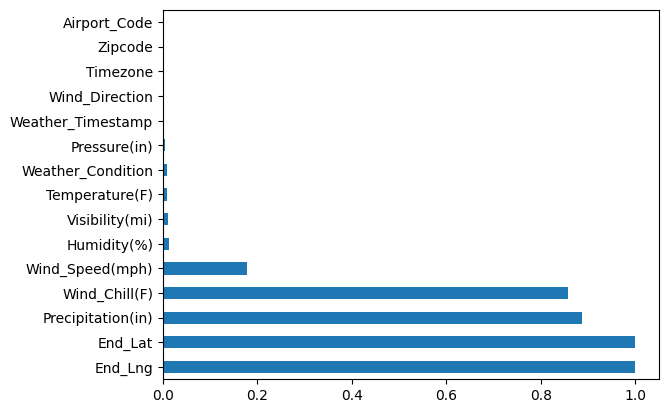

In [14]:
missing_percentage[missing_percentage!=0].plot(kind='barh')

## **Data Analysis and Visulization**
columns to analys
1. city
2. start time
3. start long,start late
4. temprature
5. weather condition


In [15]:
cities=df.City.unique()
len(cities)

408

In [16]:
cities_by_accident=df.City.value_counts()
cities_by_accident

,count
City,
Sacramento,1151
San Jose,574
Oakland,395
Dayton,321
San Francisco,271
...,...
Birds Landing,1
Fiddletown,1
Gridley,1


In [17]:
cities_by_accident.head(20)

,count
City,
Sacramento,1151
San Jose,574
Oakland,395
Dayton,321
San Francisco,271
Stockton,214
Tracy,212
Hayward,194
Columbus,170


# **Ask & Answer Questions**

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Does New York show up in the data? If yes, why is the count lower if this is the most populated city?


<Axes: ylabel='City'>

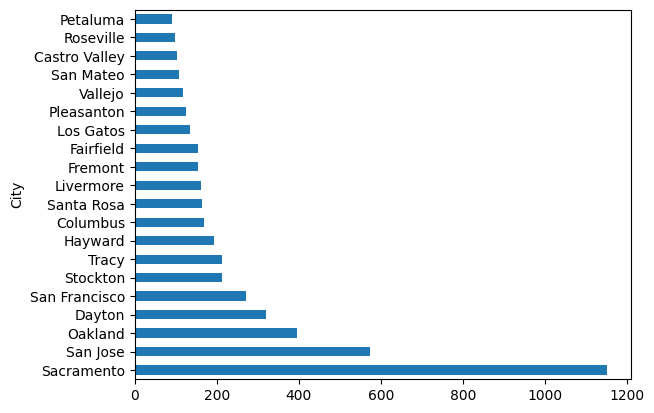

In [18]:
cities_by_accident.head(20).plot(kind='barh')

<Axes: xlabel='count', ylabel='Count'>

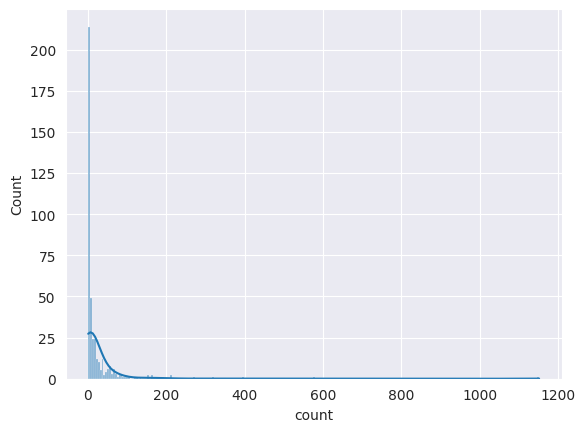

In [19]:
import seaborn as sns
sns.set_style('darkgrid')
sns.histplot(cities_by_accident,kde=True)


In [20]:
higher_accident_cities=cities_by_accident[cities_by_accident>1000]
higher_accident_cities=cities_by_accident[cities_by_accident<1000]
len(higher_accident_cities)/len(cities)


0.9975490196078431

<Axes: xlabel='count', ylabel='Count'>

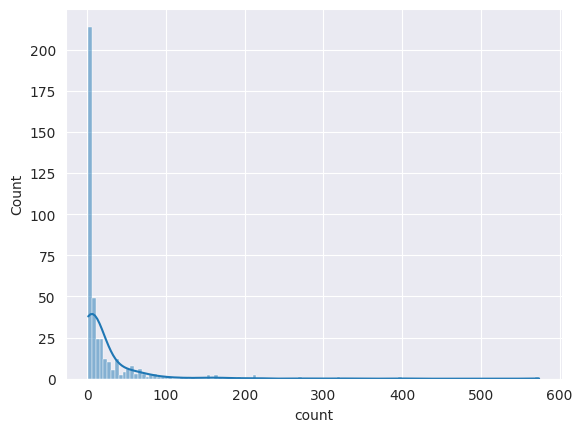

In [21]:
sns.histplot(higher_accident_cities,kde=True)

<Axes: xlabel='count', ylabel='Count'>

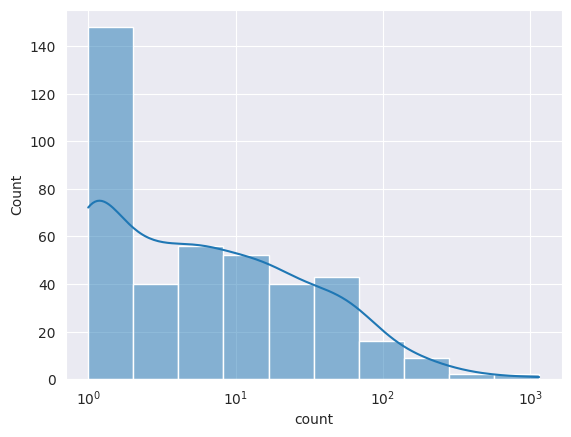

In [22]:
sns.histplot(cities_by_accident,kde=True,log_scale=True)

In [23]:
cities_by_accident[cities_by_accident==1].count()

104

In [24]:
df.Start_Time

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
9995,2017-01-06 16:01:06
9996,2017-01-06 16:14:00
9997,2017-01-06 16:08:58
9998,2017-01-06 16:25:01


In [25]:
pd.to_datetime(df.Start_Time)

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
9995,2017-01-06 16:01:06
9996,2017-01-06 16:14:00
9997,2017-01-06 16:08:58
9998,2017-01-06 16:25:01


In [26]:
df['Start_Time'] = pd.to_datetime(df['Start_Time']) # Convert 'Start_Time' column to datetime objects
df.Start_Time.dt.hour  # Now you can access the hour

,Start_Time
0,5
1,6
2,6
3,7
4,7
...,...
9995,16
9996,16
9997,16
9998,16


<Axes: xlabel='Start_Time', ylabel='Density'>

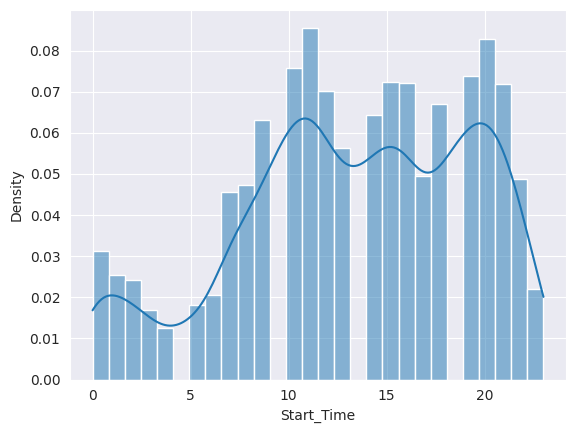

In [27]:
sns.histplot(df.Start_Time.dt.hour, kde=True, stat="density")

<Axes: xlabel='Start_Time', ylabel='Density'>

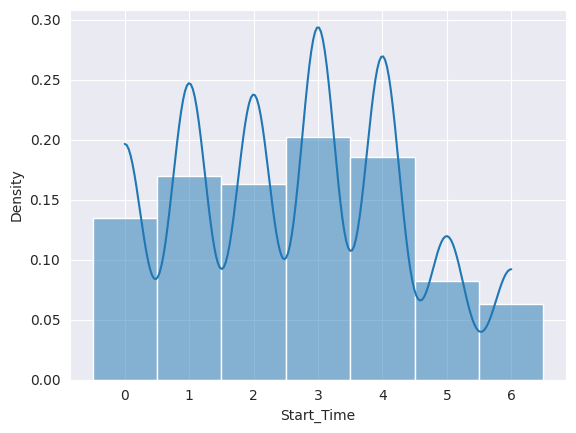

In [28]:
sns.histplot(df.Start_Time.dt.day_of_week, kde=True, stat="density",discrete=True,bins=7)

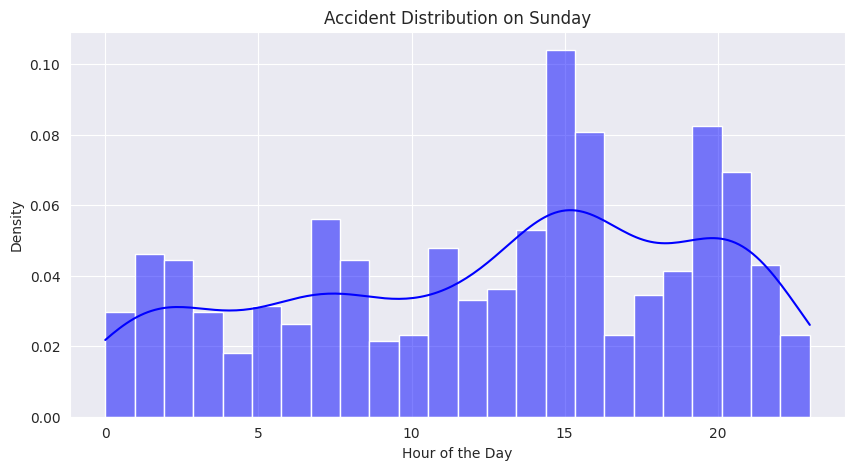

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Sunday
df_sunday = df[df['Start_Time'].dt.dayofweek == 6]  # Sunday

# Plot histogram for Sunday
plt.figure(figsize=(10,5))
sns.histplot(df_sunday.Start_Time.dt.hour, kde=True, color='blue', stat='density', bins=24)
plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.title("Accident Distribution on Sunday")
plt.show()


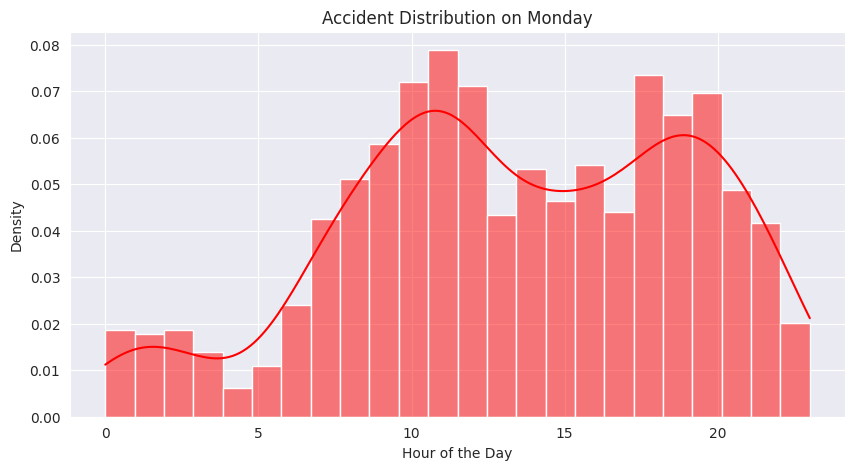

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Monday
df_monday = df[df['Start_Time'].dt.dayofweek == 0]  # Monday

# Plot histogram for Monday
plt.figure(figsize=(10,5))
sns.histplot(df_monday.Start_Time.dt.hour, kde=True, color='red', stat='density', bins=24)
plt.xlabel("Hour of the Day")
plt.ylabel("Density")
plt.title("Accident Distribution on Monday")
plt.show()


- Morning Peak: Around 7 AM to 10 AM (rush hour)
- Evening Peak: Around 4 PM to 7 PM (after-work traffic)
- Lowest Accidents: Between 12 AM to 5 AM (late-night hours)

### **Ask & Answer Questions**

1. Does New York show up in the data? If yes, why is the count lower if this the most populated city?
2. Among the top 100 cities in number of accidents, which states do they belong to most frequently?
3. What time of the day are accidents most frequent in?
4. Which days of the week have the most accidents?
5. Which months have the most accidents?
6. What is the trend of accidents year over year (*decreasing/increasing?*)


## **Summeries and Accidents**
**Insights**
- No data from new york
- 5% of cites have more accidents than
 1000 yearly.
- 104 cities have 1 accident yearly.


<Axes: xlabel='Start_Time', ylabel='Density'>

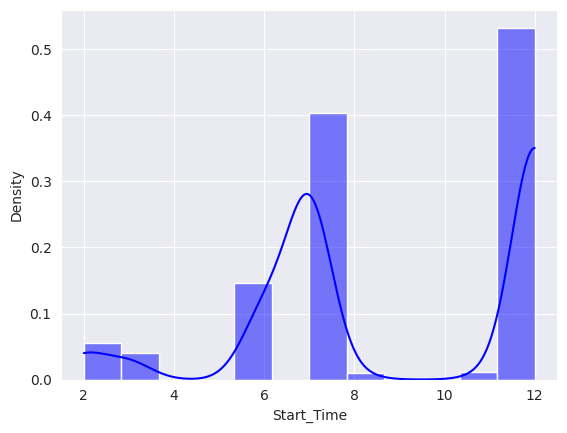

In [31]:
df_2019=df[df.Start_Time.dt.year==2016]
# Replace 'norm_hist' with 'stat="density"' to normalize the histogram
sns.histplot(df_2019.Start_Time.dt.month, kde=True, color='blue', stat="density", bins=12)

## **start Latitute and Longitute**

In [32]:
df['Start_Lat'] # Access using bracket notation with correct capitalization.
#OR
df.Start_Lat    # Access using attribute-style with correct capitalization.

,Start_Lat
0,39.865147
1,39.928059
2,39.063148
3,39.747753
4,39.627781
...,...
9995,38.701267
9996,36.981407
9997,37.326691
9998,37.930088


In [33]:
df.Start_Lng # Access using attribute-style with correct capitalization.
# OR
df['Start_Lng'] # Access using bracket notation with correct capitalization.

,Start_Lng
0,-84.058723
1,-82.831184
2,-84.032608
3,-84.205582
4,-84.188354
...,...
9995,-121.077751
9996,-122.011192
9997,-121.940720
9998,-122.324036


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

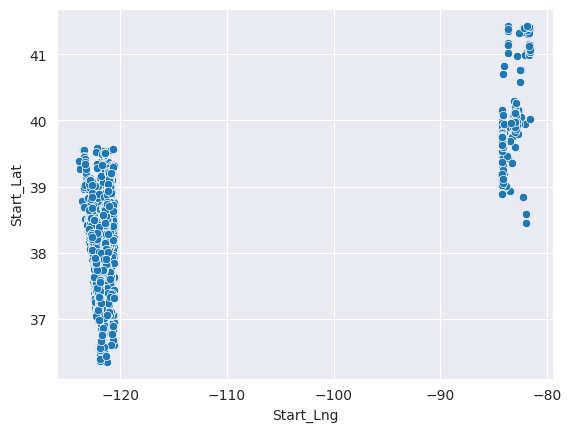

In [34]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

In [35]:
import plotly.express as px
fig = px.scatter(df, x="Start_Lng", y="Start_Lat", opacity=0.5)
fig.show()


In [36]:
import folium

In [37]:
Lat, Lng = df.Start_Lat[0], df.Start_Lng[0]  # Use square brackets to access elements by index
Lat,Lng

(39.865147, -84.058723)

In [38]:
for index, row in df[['Start_Lat', 'Start_Lng']].sample(100).iterrows():
    print(row.Start_Lat, row.Start_Lng)


37.256069 -121.871117
38.47937 -122.73349
37.77953 -121.315125
37.878185 -122.307175
38.581482 -121.401505
38.258358 -121.296295
37.108807 -121.018059
41.420975 -81.689758
39.785046 -84.236137
37.808361 -122.241493
37.69458 -122.143761
37.364819 -120.659966
38.134083 -122.476372
37.599125 -122.214806
37.958275 -121.258858
39.945255 -82.600075
37.380482 -121.995895
37.765034 -121.388123
38.455944 -121.405571
38.242809 -122.085381
37.737331 -122.19333600000002
38.018745 -121.94288600000002
37.742188 -121.525635
39.315437 -120.61721
38.683777 -121.438431
37.330406 -122.014282
37.68367 -121.053009
37.374935 -120.600594
38.302711 -122.303444
37.878185 -122.307175
38.581444 -121.504272
37.75296 -121.351753
37.435345 -122.320602
38.258347 -122.062263
37.394585 -121.136063
37.992416 -122.125092
38.481689 -121.39753
37.661167 -121.906128
37.709324 -122.467308
37.318462 -121.990021
39.974415 -82.848854
37.929256 -122.386436
36.976856 -121.900253
40.10059 -82.92519399999998
37.738861 -121.596542


In [44]:
list(zip(list(df.Start_Lat), list(df.Start_Lng)))
# Use the zip function to pair elements from the two series
# and then convert the result into a list

[(39.865147, -84.058723),
 (39.92805900000001, -82.831184),
 (39.063148, -84.032608),
 (39.747753, -84.20558199999998),
 (39.627781, -84.188354),
 (40.10059, -82.92519399999998),
 (39.758274, -84.23050699999997),
 (39.770382, -84.194901),
 (39.778061, -84.172005),
 (40.10059, -82.92519399999998),
 (39.952812, -83.119293),
 (39.932709, -82.83091),
 (39.737633, -84.14993299999998),
 (39.79076, -84.241547),
 (39.972038, -82.913521),
 (39.745888, -84.17041),
 (39.748329, -84.224007),
 (39.752174, -84.239952),
 (39.740669, -84.184135),
 (39.790703, -84.244461),
 (40.052509, -82.88233199999998),
 (39.773346, -84.224686),
 (39.628288, -84.226151),
 (40.023487, -82.994888),
 (39.761379, -84.25921600000002),
 (40.158024, -82.641762),
 (39.733219, -84.159653),
 (39.775303, -84.200523),
 (39.789322, -84.23910500000002),
 (39.75872, -84.183762),
 (40.081459, -83.122398),
 (39.83321, -84.112946),
 (40.042725, -82.99730699999998),
 (39.974415, -82.848854),
 (39.994766, -83.02449),
 (40.006477, -83.0

In [46]:
import folium
from folium.plugins import HeatMap

# Take a random sample of 0.001 (0.1%) of the dataset
sample_df = df.sample(int(0.001 * len(df)))

# Create a list of latitude and longitude pairs
lat_lon_pairs = list(zip(sample_df.Start_Lat, sample_df.Start_Lng))

# Create a Folium map centered around the first point
map_ = folium.Map(location=[sample_df.Start_Lat.iloc[0], sample_df.Start_Lng.iloc[0]], zoom_start=10)

# Add heatmap layer to the map
HeatMap(lat_lon_pairs).add_to(map_)

# Display the map
map_
